In [ ]:
import pandas as pd
teams = pd.read_csv("teams.csv")
teams = teams[["team", "country","year","athletes","age","prev_medals","medals"]]

In [ ]:
import seaborn as sns
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

In [ ]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

In [ ]:
teams.plot.hist(y="medals")

In [ ]:
teams[teams.isnull().any(axis=1)]
teams = teams.dropna()
teams

In [ ]:
train = teams[teams["year"] < 2012].copy() #the model will be trained on data it hasnt seen before
test = teams[teams["year"] >= 2012].copy()

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
predictors = ['athletes', 'prev_medals'] #it will use these two columns
target = 'medals' #to predict this column

In [ ]:
reg.fit(train[predictors], train['medals'])

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
test["predictions"] = predictions
test

In [ ]:
test.loc[test["predictions"]<0, "predictions"] = 0 #replace values that are less than 0 to 0

In [ ]:
test["predictions"] = test["predictions"].round() #round to the nearest whole number
test

In [ ]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error #on average the model is off by 3.3  medals

In [ ]:
teams.describe()["medals"]

In [ ]:
test[test["team"] == "IND"]

In [ ]:
errors = (test["medals"] - test["predictions"]).abs() #finding the mean absolute error for each row
errors

In [ ]:
error_by_team = errors.groupby(test["team"]).mean() #grouping by team and finding the mean of the errors
error_by_team

In [ ]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio = error_by_team / medals_by_team
error_ratio #some values a Nan because the team has no medals

In [ ]:
error_ratio[~pd.isnull(error_ratio)]

In [68]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)] #removing infinite values
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

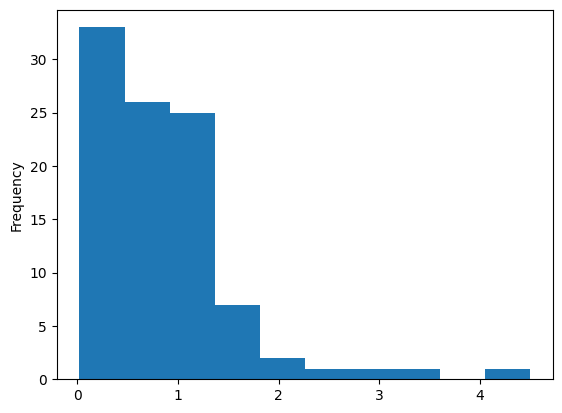

In [69]:
error_ratio.plot.hist()